         Date  Precio_cierre Ticker
0  2024-04-01      94.019997    MMM
1  2024-04-02      92.839996    MMM
2  2024-04-03      93.190002    MMM
3  2024-04-04      90.540001    MMM
4  2024-04-05      91.029999    MMM
          Date  Precio_cierre Ticker    Return
630 2024-04-01     145.559998      A  0.000000
631 2024-04-02     144.169998      A -0.954932
632 2024-04-03     143.729996      A -0.305197
633 2024-04-04     141.339996      A -1.662840
634 2024-04-05     144.119995      A  1.966888
        std_return  range_return  mean_abs_return
Ticker                                           
A         1.888714     13.614967         1.313843
AAL       2.700835     20.141823         1.743314
AAP       2.742389     18.142082         1.948264
AAPL      1.717362      9.451262         1.193130
ABT       1.032528      6.205312         0.752065
...            ...           ...              ...
YUM       1.029368      6.591039         0.739295
ZBH       1.089547      5.934855         0.829487
ZB

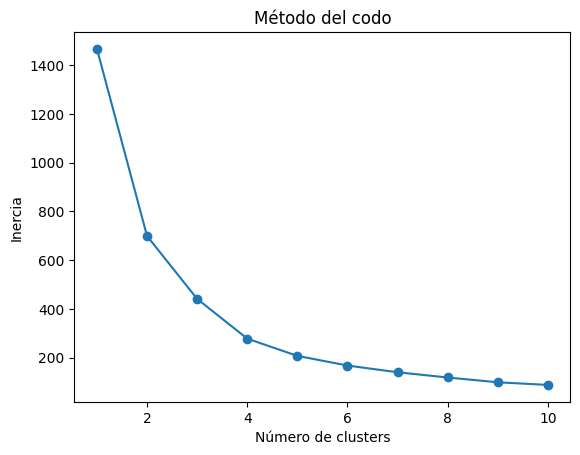

        std_return  range_return  mean_abs_return  Cluster
Ticker                                                    
A         0.390804      0.621259         0.396755        1
AAL       1.522382      1.694955         1.389700        2
AAP       1.580281      1.365989         1.863547        2
AAPL      0.152048     -0.063689         0.117664        1
ABT      -0.802173     -0.597661        -0.902084        0
    Ticker  Cluster
0        A        1
1      AAL        2
2      AAP        2
3     AAPL        1
4      ABT        0
..     ...      ...
484    YUM        0
485    ZBH        0
486   ZBRA        1
487   ZION        1
488    ZTS        1

[489 rows x 2 columns]
        PC1       PC2  Cluster
0  0.810448  0.157856        1
1  2.658474  0.214487        2
2  2.774985 -0.353297        2
3  0.121688 -0.127761        1
4 -1.329614  0.215671        0
Cluster
0    270
1    166
2     51
3      2
Name: count, dtype: int64
        PC1       PC2  Cluster
0  0.810448  0.157856        1
1  2.

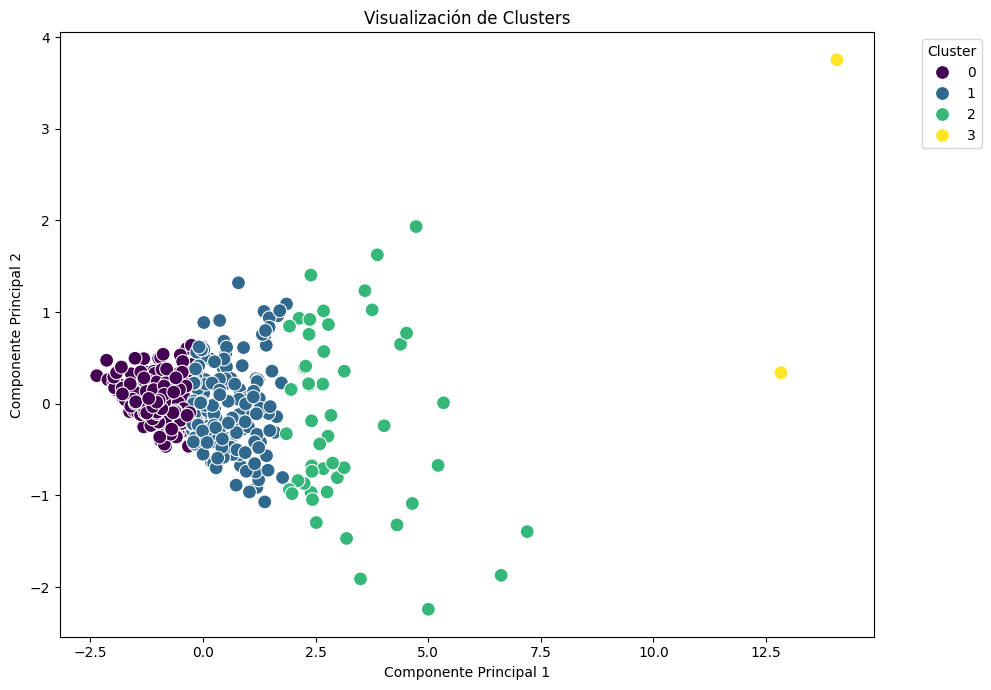

PC1        0
PC2        0
Cluster    0
dtype: int64
Empresas en Cluster 0:
  Ticker  Cluster
3   AAPL        0
4    ABT        0

Empresas en Cluster 1:
  Ticker  Cluster
0      A        1
1    AAL        1
2    AAP        1

Empresas en Cluster 2:
Empty DataFrame
Columns: [Ticker, Cluster]
Index: []

Empresas en Cluster 3:
Empty DataFrame
Columns: [Ticker, Cluster]
Index: []
    Ticker  Cluster
0        A        1
1      AAL        2
2      AAP        2
3     AAPL        1
4      ABT        0
..     ...      ...
484    YUM        0
485    ZBH        0
486   ZBRA        1
487   ZION        1
488    ZTS        1

[489 rows x 2 columns]

Empresas en Cluster 0:
    Ticker  Cluster
4      ABT        0
5     ACGL        0
6      ACN        0
9      ADM        0
10     ADP        0
..     ...      ...
481    XOM        0
482   XRAY        0
483    XYL        0
484    YUM        0
485    ZBH        0

[270 rows x 2 columns]

Empresas en Cluster 1:
    Ticker  Cluster
0        A        1
3    

'Considero que este análisis puede ser útil para tomar decisiones financieras, porque permite conocer el perfil de las empresas, poniendo a disposición de los usuarios diversas opciones de inversión o un portafolio mas amplio.\nAdicionalmente permite caracterizar el riesgo de las empresas por grupo, brindando al usuario la posibilidad de decidir mejor entre el mayor riesgo, mejor oportunidad de rentabilidad o por el contrario mayor estabilidad. Esto no solo permite\ncaracterizar las empresas, sino que tambien permite caracterizar el grupo de usuarios según las acciones donde decidan invertir, puede decirse que los usuarios que seleccionan el Cluster 0, son mas conservadores, o los que seleccionen empresas del cluster 1 estan más dispuestos a asumir mayores riesgos.'

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Cargar datos y limpiarlos
df = pd.read_csv('/Precios-empresas-CSV.csv')
print(df.head())
df = df.dropna()
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Ticker', 'Date'])
df['Return'] = df.groupby('Ticker')['Precio_cierre'].pct_change() * 100
df = df.fillna(0)
print(df.head())

# Paso 3: Cálculo de Retornos Porcentuales Diarios - Paso 4: indicadores de volatilidad
resultados = df.groupby('Ticker').agg(
    std_return=('Return', 'std'),
    range_return=('Return', lambda x: x.max() - x.min()),
    mean_abs_return=('Return', lambda x: x.abs().mean()))
print(resultados)

# Paso 5: Escalamiento de los Datos
scaler = StandardScaler()
resultados_scaled = scaler.fit_transform(resultados)
resultados_scaled_df = pd.DataFrame(resultados_scaled, index=resultados.index, columns=resultados.columns)
print(resultados_scaled_df.head())

# Paso 6: Clusterización - Determinar clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(resultados_scaled_df)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()

# Aplicar KMeans
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
kmeans.fit(resultados_scaled_df)
resultados_scaled_df['Cluster'] = kmeans.labels_
print(resultados_scaled_df.head())

resultados['Cluster'] = kmeans.labels_
df_clusters = resultados[['Cluster']].reset_index()
print(df_clusters)

# Reducir dimensionalidad
pca = PCA(n_components=2)
pca_result = pca.fit_transform(resultados_scaled_df.drop(columns='Cluster'))
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = resultados_scaled_df['Cluster'].values
print(pca_df.head())

# Visualizar resultados
print(pca_df['Cluster'].value_counts())
pca_df = pca_df.dropna(subset=['Cluster'])
print(pca_df.head())
plt.figure(figsize=(10, 7))
scatter_plot = sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
handles, labels = scatter_plot.get_legend_handles_labels()
scatter_plot.legend(handles=handles, labels=labels, title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Visualización de Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.tight_layout()
plt.show()

print(pca_df.isnull().sum())

# Empresas por cluster
df_clusters = pd.DataFrame({
    'Ticker': ['A', 'AAL', 'AAP', 'AAPL', 'ABT'],
    'Cluster': [1, 1, 1, 0, 0]
})

empresas_cluster_0 = df_clusters[df_clusters['Cluster'] == 0]
empresas_cluster_1 = df_clusters[df_clusters['Cluster'] == 1]
empresas_cluster_2 = df_clusters[df_clusters['Cluster'] == 2]
empresas_cluster_3 = df_clusters[df_clusters['Cluster'] == 3]

print("Empresas en Cluster 0:")
print(empresas_cluster_0)

print("\nEmpresas en Cluster 1:")
print(empresas_cluster_1)

print("\nEmpresas en Cluster 2:")
print(empresas_cluster_2)

print("\nEmpresas en Cluster 3:")
print(empresas_cluster_3)

df_clusters = resultados[['Cluster']].reset_index()
print(df_clusters)
for cluster_id in range(n_clusters):
    print(f"\nEmpresas en Cluster {cluster_id}:")
    empresas_cluster = df_clusters[df_clusters['Cluster'] == cluster_id]
    print(empresas_cluster)

#Paso 9: Análisis e Interpretación
#1. Interpretar los resultados:o Analiza los clusters y describe las características de cada grupo. ¿Qué patrones observas en las empresas agrupadas? ¿Hay algún comportamiento común en las empresas dentro de un mismo cluster?
'''Teniendo en cuenta el metodo de codo, seleccione 4 clusters.
Los clusters son:
Observo que en el cluster 0, hay agrupadas 270 empresas, que tienen una variabilidad en el retorno mas baja, es decir son empresas mas estables, en lo referente al precio de sus acciones, podemos decir que son menos volatiles.
La desviación estandar de estas empresas es más baja, lo que significa que sus movimientos son menos riesgosos.
Los rangos de retornos diarios son bajos, lo que puede indicar que no hay cambios extremos en los retornos.

Para el Cluster 1, hay agrupadas 166 empresas, en este grupo los retornos diarios son mas amplios, es decir hay una mayor volatilidad, sus rendimientos varian más y los precios son más extremos.

Para el Cluster 2, hay agrupadas 51 empresas, en este punto del análisis se puede evidenciar que estas empresas son un punto intermedio entre las que estan en el Cluster 0 y 1. Tanto su volatilidad como retornos diarios son intermedios, puede decirse que el riesgo tambien lo es.

Para el cluster 3, se agruparon 2 empresas, debido a que estas no fueron identificadas en los grupos anteriores, no se pueden generalizar resultados, deberiamos analizarlas de manera individual.'''


#2. Conclusiones: o Escribe un breve resumen de las conclusiones obtenidas a partir del análisis y la clusterización. ¿Cómo podría este análisis ser útil para tomar decisiones financieras?
'''Considero que este análisis puede ser útil para tomar decisiones financieras, porque permite conocer el perfil de las empresas, poniendo a disposición de los usuarios diversas opciones de inversión o un portafolio mas amplio.
Adicionalmente permite caracterizar el riesgo de las empresas por grupo, brindando al usuario la posibilidad de decidir mejor entre el mayor riesgo, mejor oportunidad de rentabilidad o por el contrario mayor estabilidad. Esto no solo permite
caracterizar las empresas, sino que tambien permite caracterizar el grupo de usuarios según las acciones donde decidan invertir, puede decirse que los usuarios que seleccionan el Cluster 0, son mas conservadores, o los que seleccionen empresas del cluster 1 estan más dispuestos a asumir mayores riesgos.'''
